##### 1-Project Definition
##### 2-Prepare Dataset
##### 3-Explore Data
##### 4-Find Model 
##### 5-Experiments with different models & Select More accurated model
##### 6-Hyperparameter Tuning
##### 7-Evaluation
##### 8-Conclusion
 

### 1 - Project Definition

##### Our project is find the best model for predict heart disease or not

#### Data Properties

1. age
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure,above 130-140 is typically cause for concern
5. chol - serum cholestoral
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no)

### 2 - Prepare Dataset

#### Collect Data set from kaggle

In [1]:
#### Import required liberies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline


#### Load the dataset

In [4]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
heart_disease.shape

(303, 14)

In [6]:
### check missing values

heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
### we have no missing values , then move to data exploration

#### 3 - Data Exploration

In [8]:
### Target counts

heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [9]:
### so 165 people have disease & 138 are not

In [10]:
### now we find patterns using diiferent properties

### first we check disease frequency with gender

heart_disease["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
### compare with target

pd.crosstab(heart_disease.target,heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [12]:
### here we can see, 24 females have not disease, 114 females have disease
### similarly 72 men have not disease & 93 male have 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

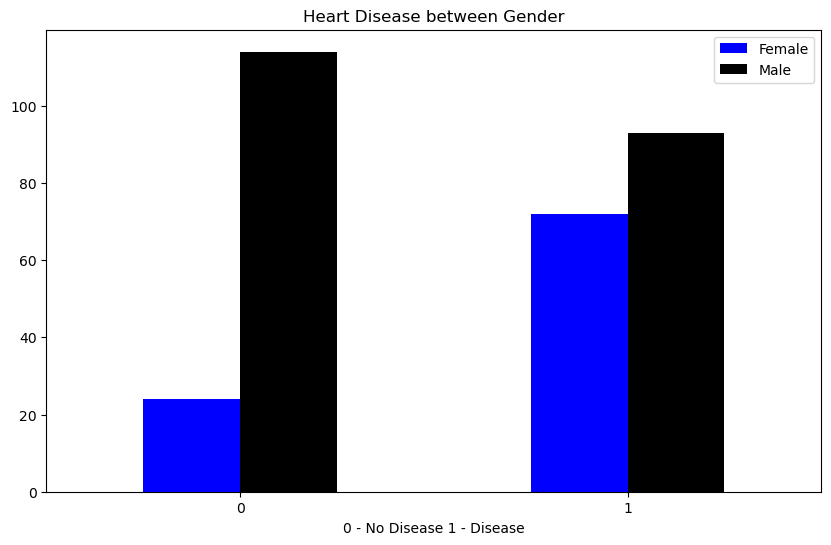

In [13]:
### lets drow a graph for better view

pd.crosstab(heart_disease.target,heart_disease.sex).plot(kind="bar",figsize=(10,6),color=["blue","black"])
plt.title("Heart Disease between Gender")
plt.xlabel("0 - No Disease 1 - Disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)


In [14]:
### Now check age vs heart rate

pd.crosstab(heart_disease.age,heart_disease["thal"])

thal,0,1,2,3
age,,,,
29,0,0,1,0
34,0,0,2,0
35,0,0,2,2
37,0,0,2,0
38,0,0,2,1
39,0,0,3,1
40,0,0,0,3
41,0,1,8,1
42,0,1,6,1


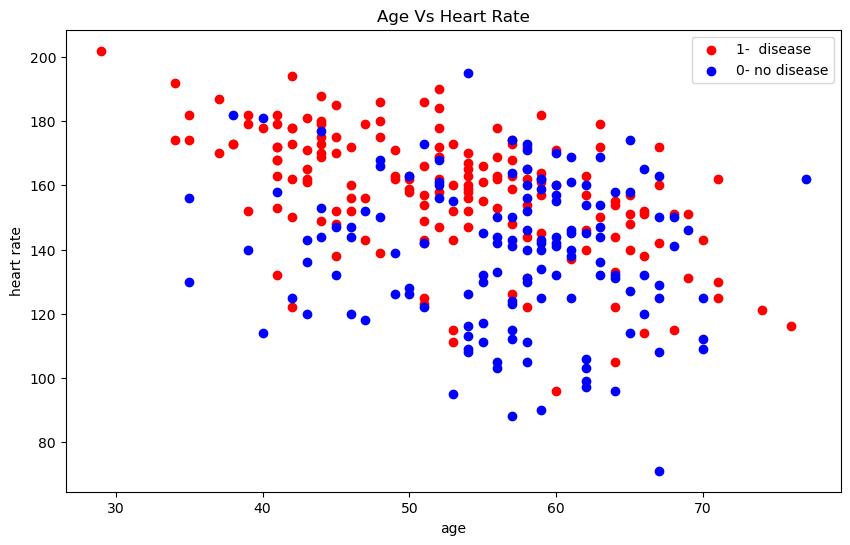

In [15]:
### create a scatter plot

plt.figure(figsize=(10,6))
plt.scatter(heart_disease.age[heart_disease.target==1],
            heart_disease.thalach[heart_disease.target==1],color="red" )

plt.scatter(heart_disease.age[heart_disease.target==0],
            heart_disease.thalach[heart_disease.target==0],color="blue" )

plt.xlabel("age")
plt.ylabel("heart rate")
plt.title("Age Vs Heart Rate")
plt.legend(["1-  disease ", "0- no disease"])




<Axes: ylabel='Frequency'>

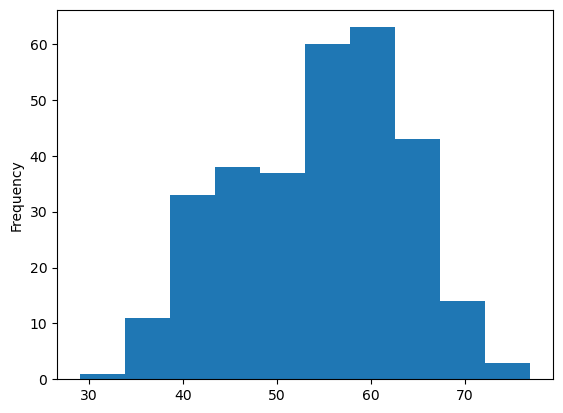

In [16]:
heart_disease.age.plot(kind='hist')

In [17]:
### Chest pain vs target

In [18]:
pd.crosstab(heart_disease.cp,heart_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

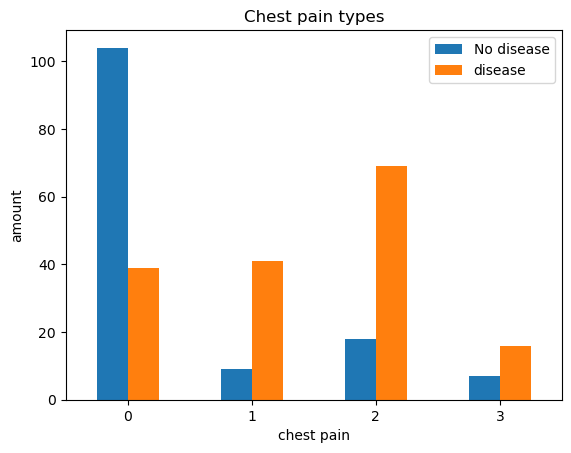

In [19]:
pd.crosstab(heart_disease.cp,heart_disease.target).plot(kind="bar")
plt.xlabel("chest pain")
plt.ylabel("amount")
plt.title("Chest pain types")
plt.legend(["No disease", "disease"])
plt.xticks(rotation=0)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
### Now find correlation

In [22]:
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [23]:
### For More Readable

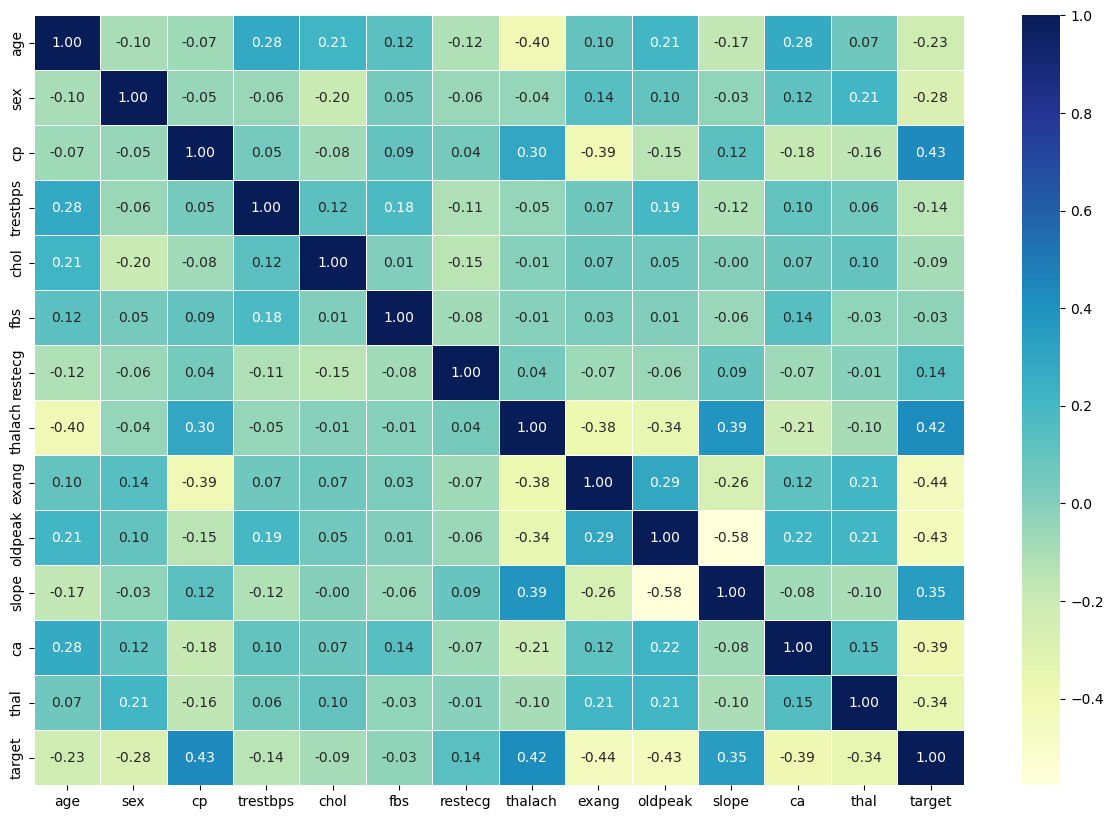

In [24]:
corr_metrix = heart_disease.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_metrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

#### 4 - Find Model

##### split data for modeling

In [25]:
x=heart_disease.drop("target",axis=1)
y=heart_disease["target"]

In [26]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [27]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [28]:
### import train test split
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [29]:
### Here we splt data into two part
### 80 % data for train & rest for test

In [30]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### Our problem is classification type
##### so we use the following models
##### 1 - logistic regression
##### 2 - k-nearest neigbor
##### 3 - random forest classification

In [31]:
### We find best models by using loop

In [32]:
### import required models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [35]:
### first create a dictionary

models = {
    "Logistic Regression" : LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier()
}
def fit_model(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_score ={}
    ###loop through models
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name]=model.score(x_test,y_test)
    return model_score
    

model_score=fit_model(
    models=models,
    x_train=x_train,
    x_test=x_test,
    y_train=y_train,
    y_test=y_test
)
model_score

c:\Users\L123\Desktop\ML\Projects\Heart\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

(array([0]), [Text(0, 0, 'accuracy')])

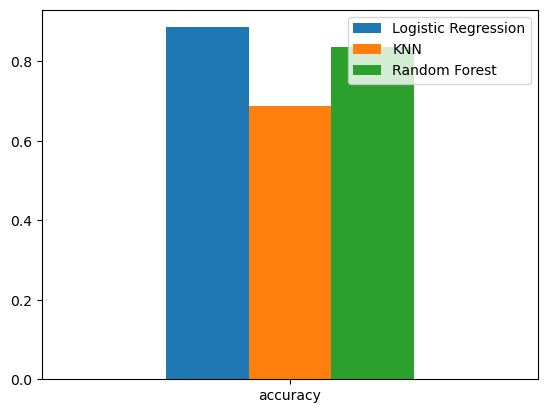

In [36]:
### Plot

model_compare = pd.DataFrame(model_score,index=["accuracy"])
model_compare.plot.bar()
plt.xticks(rotation=0)

##### 6 - HyperParameter Tuning

###### logistic regression and random forest classification are more better than KNN
###### so we tune logistic & random forest classifier for more accuracy

#### Tuning with Randomized Search CV

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
#### first we select logistic regression for tuning

log_reg = {
    'C' : np.logspace(-4,4,20),
    'solver':["liblinear"]
}

### c & solver are parameter of logistic regression

np.random.seed(42)

rc_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rc_log_reg.fit(x_train,y_train)
rc_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [39]:
rc_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

#### Now tuning Random Forest Classifier

In [40]:
rf_cl ={
    'n_estimators':np.arange(10,1000,5),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
} 

In [41]:
rf_grid = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions=rf_cl,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rf_grid.fit(x_train,y_train)
                            

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,  70,
        75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130, 135,
       140, 145, 150, 155, 160, 1...
       530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590,
       595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655,
       660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720,
       725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785,
       790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850,
       855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915,
       920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980,
       985, 990, 995])},
                   verbose=True)

In [44]:
rf_grid.score(x_test,y_test)

0.8688524590163934

In [45]:
rf_grid.best_params_

{'n_estimators': 805,
 'min_samples_split': 16,
 'min_samples_leaf': 13,
 'max_depth': 10}

#### Score improved from 83% to 86%

#### Now Tune with Grid Search Cv

In [46]:
from sklearn.model_selection import GridSearchCV

In [48]:
#### try with logistic regression

log_grid = {
    'C':np.logspace(-4,4,20),
    'solver':["liblinear"]
}
log_grid_cv=GridSearchCV(
    LogisticRegression(),
    param_grid=log_grid,
    cv=5,
    verbose=True

    
)
log_grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [49]:
log_grid_cv.score(x_test,y_test)

0.8852459016393442

In [50]:
log_grid_cv.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [44]:
# #### Similarly with Random Forest Classifier

# rf_gs = {
#     'n_estimators':np.arange(10,1000,5),
#     'max_depth':[None,3,5,10],
#     'min_samples_split':np.arange(2,20,2),
#     'min_samples_leaf':np.arange(1,20,2)
# }

# rf_gs_grid = GridSearchCV(
#     RandomForestClassifier(),
#     param_grid=rf_gs,
    
#     cv=5,
#     verbose=True
# )

# rf_gs_grid.fit(x_train,y_train)

#### 7 - Evaluation

#### Evaluate our models with


* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [51]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [52]:
#### Make Prediction with tuned model

y_preds = log_grid_cv.predict(x_test)

In [53]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [54]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [55]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


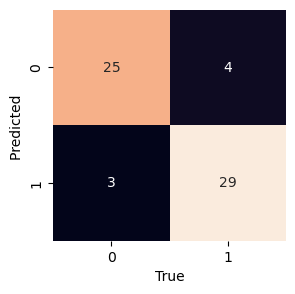

In [56]:
### For better view
def plot_conf_mat(y_test, y_preds):
   
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted ")
    
    
plot_conf_mat(y_test, y_preds)

In [57]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### calculate evaluation metrics using cross validation

In [58]:
from sklearn.model_selection import cross_val_score

In [53]:
log_grid_cv.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [59]:
clf = LogisticRegression(
    C= 0.23357214690901212,
    solver='liblinear'
)

cv_accuracy = cross_val_score(clf,x,y,cv=5,scoring='accuracy')
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [60]:
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

In [61]:
cv_precison = cross_val_score(clf,x,y,cv=5,scoring='precision')



In [62]:
cv_precison = np.mean(cv_precison)
cv_precison

0.8215873015873015

In [63]:
cv_recall = cross_val_score(clf,x,y,cv=5,scoring='recall')


In [64]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [65]:
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

#### Visualize Cv metrics


<Axes: title={'center': 'CV Metrics'}>

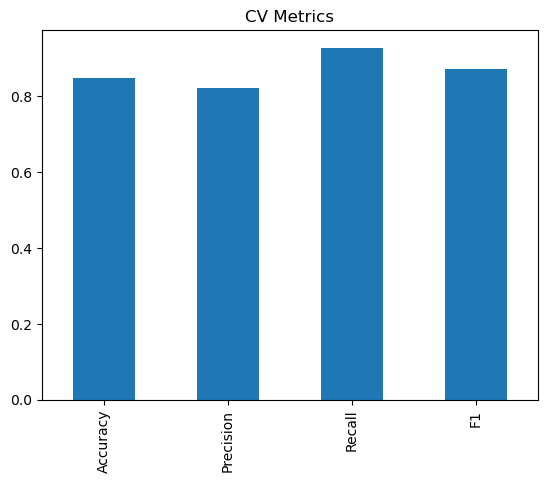

In [66]:
cv_metrics = pd.DataFrame({
    'Accuracy':cv_accuracy,
    'Precision' : cv_precison,
    'Recall':cv_recall,
    "F1":cv_f1},
    index=[0]
)
cv_metrics.T.plot(kind='bar',title="CV Metrics",legend=False)



In [67]:
#### Which Feature has more important

clf.fit(x_train,y_train)
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590906,
         0.47095113, -0.65165351, -0.699842  ]])

In [68]:
feature_dict = dict(zip(heart_disease.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699218314634231,
 'sex': -0.9042408481315317,
 'cp': 0.6747282826858118,
 'trestbps': -0.011613404239724763,
 'chol': -0.0017036448048050072,
 'fbs': 0.04787689050301493,
 'restecg': 0.33490183888358416,
 'thalach': 0.024729385199310817,
 'exang': -0.6312040056168838,
 'oldpeak': -0.5759090611742839,
 'slope': 0.47095113183576787,
 'ca': -0.6516535125690047,
 'thal': -0.6998419969792693}

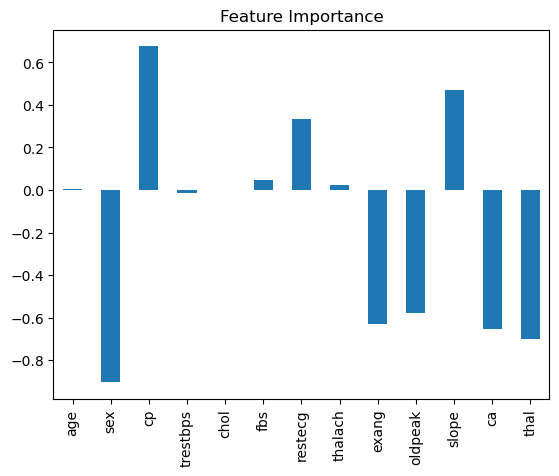

In [69]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [65]:
#### Save Our Model

# from joblib import load,dump
# dump(clf,filename='Heart-Disease-model.joblib')

['Heart-Disease-model.joblib']

In [66]:
# loaded = load(filename="Heart-Disease-model.joblib")
# loaded.score(x_test,y_test)

0.8852459016393442

In [77]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
### prediction

input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)  

### change into numpy array
input_numpy = np.asarray(input_data)
# input_numpy.shape
input_numpy
#convert shape of array,we predict only one instance
reshaped_array = input_numpy.reshape(1,-1)
#  reshaped_array
prediction = clf.predict(reshaped_array)
# prediction
if prediction[0]==0:
    print("No Heart Disease")
else:
    print("Heart Disease")

No Heart Disease


c:\Users\L123\Desktop\ML\Projects\Heart\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Conclusion

Our aim is find best model for predict heart disease
our project answer should be yes/no ,so we can understand that its classification model

We collect our dataset from kaggle

first step is check any missing values
then we explore the dataset.There are 13 parameters depending our target variable

when exploring data set we can understand followings

    * 207 male and 96 male
    * 93 out of 207 have disease
    * 72 out of 96 have disease
    * female have disease more than male in terms of percentage

    * above 55-65 age & above 150 heart rate have most infected
    * in terms of chest pain we can understand that Atypical angina , Non-anginal pain, Asymptomatic types pain causes heart diseases

next step is select best model
we know its a classification problem, so select the following models

    * Logistic Regression 
    * K-Nearest Neighbours Classifier
    * Random Forest Classifier

after training,testing,fitting data set, Logistic & Random forest classification have better score than KNN

Then we try to improve our models using hyperparameter tuning by Randomized Search Cv and Grid Search Cv

Grid Search Cv give more accuracy in Random forest classifier from 83% to 86%,still logistic regression has more accuracy than Random forest classifier

so we can understand that Logistic Regression model is best fit for this project

then we evaluated our tuned model with the following 

    * Confusion matrix
    * Classification report
    * Precision
    * Recall
    * F1-score

then we again did it with the help of cross validation & best params

finally we got which features contributed most to the outcome of the model
 